In [1]:
import numpy as np
from scipy.fftpack import fft
import sounddevice as sd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check microphone
sd.query_devices()

  0 dPhone Microphone, Core Audio (1 in, 0 out)
> 1 MacBook Air Microphone, Core Audio (1 in, 0 out)
< 2 MacBook Air Speakers, Core Audio (0 in, 2 out)
  3 Microsoft Teams Audio, Core Audio (2 in, 2 out)
  4 Meta Quest Remote Desktop Audio Device, Core Audio (2 in, 2 out)

In [3]:
# parameters
fs = 44100  # sample rate
duration = 10  # seconds
chunk_size = 1024  # use this as a parameter for the chunk

In [4]:
# record test audio
print("recording...")
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()  # wait for the recording to finish
print("recording done.")

recording...
recording done.


In [5]:
# generate time axis for the recording
time = np.arange(0, len(myrecording)) / fs

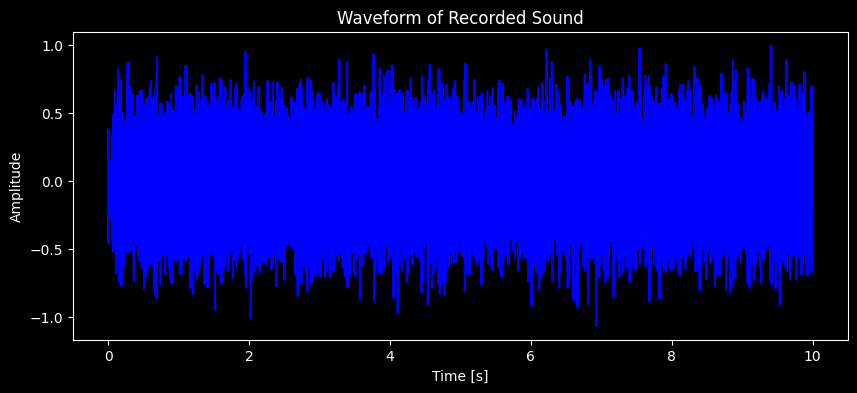

In [6]:
# plot the waveform
plt.style.use('dark_background')
plt.figure(figsize=(10, 4))
plt.plot(time, myrecording, color='b')
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.title("Waveform of Recorded Sound")
plt.show()

In [7]:
# create numpy array to store the spectogram data
spectrogram = np.empty((chunk_size // 2 + 1, 0))

In [8]:
# create a callback function
def callback(indata, frames, time, status):
    global spectrogram
    print("Callback called")
    volume_norm = np.linalg.norm(indata)*10
    y_fft = fft(indata[:, 0])
    spectrogram = np.c_[spectrogram, np.abs(y_fft[0:chunk_size // 2 + 1])]
    print(f"Spectrogram updated, new shape: {spectrogram.shape}")

In [11]:
# start stream
stream = sd.InputStream(callback=callback, channels=1, samplerate=fs, blocksize=chunk_size)

Stream started
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (513, 0)
Spectrogram data is empty.
Callback has been called, spectrogram shape is:  (

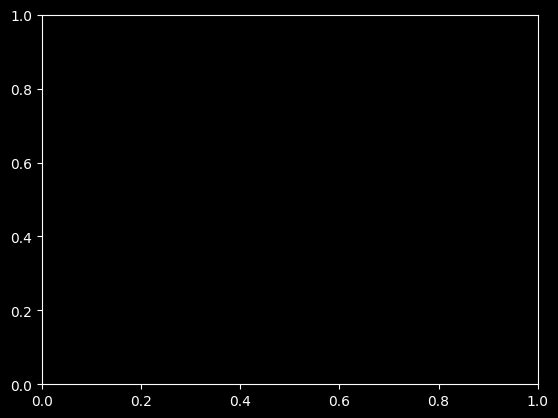

In [12]:
with stream:
    print("Stream started")
    # create figure and set up axis
    plt.style.use('dark_background')
    fig, ax = plt.subplots()

    # main loop
    for _ in range(int(fs / chunk_size * duration)):
        print("Callback has been called, spectrogram shape is: ", spectrogram.shape)
        if spectrogram.size > 0:
            # update plot
            ax = sns.heatmap(spectrogram, cmap='viridis', cbar=False)
            plt.pause(0.001)
        else:
            print("Spectrogram data is empty.")